In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [145]:
df=pd.read_csv("output_1m.csv")

In [146]:
df2=df.sort_values(["i","j","k"])

In [147]:
df2["x"]=df2["i"]-df2["j"]
df2["y"]=df2["i"]+df2["j"]

In [148]:
df3 = df2[~((df2['i'] == df2['j']) | (df2['i'] == df2['j'] - 1) | (df2['i'] == df2['j'] + 1))]

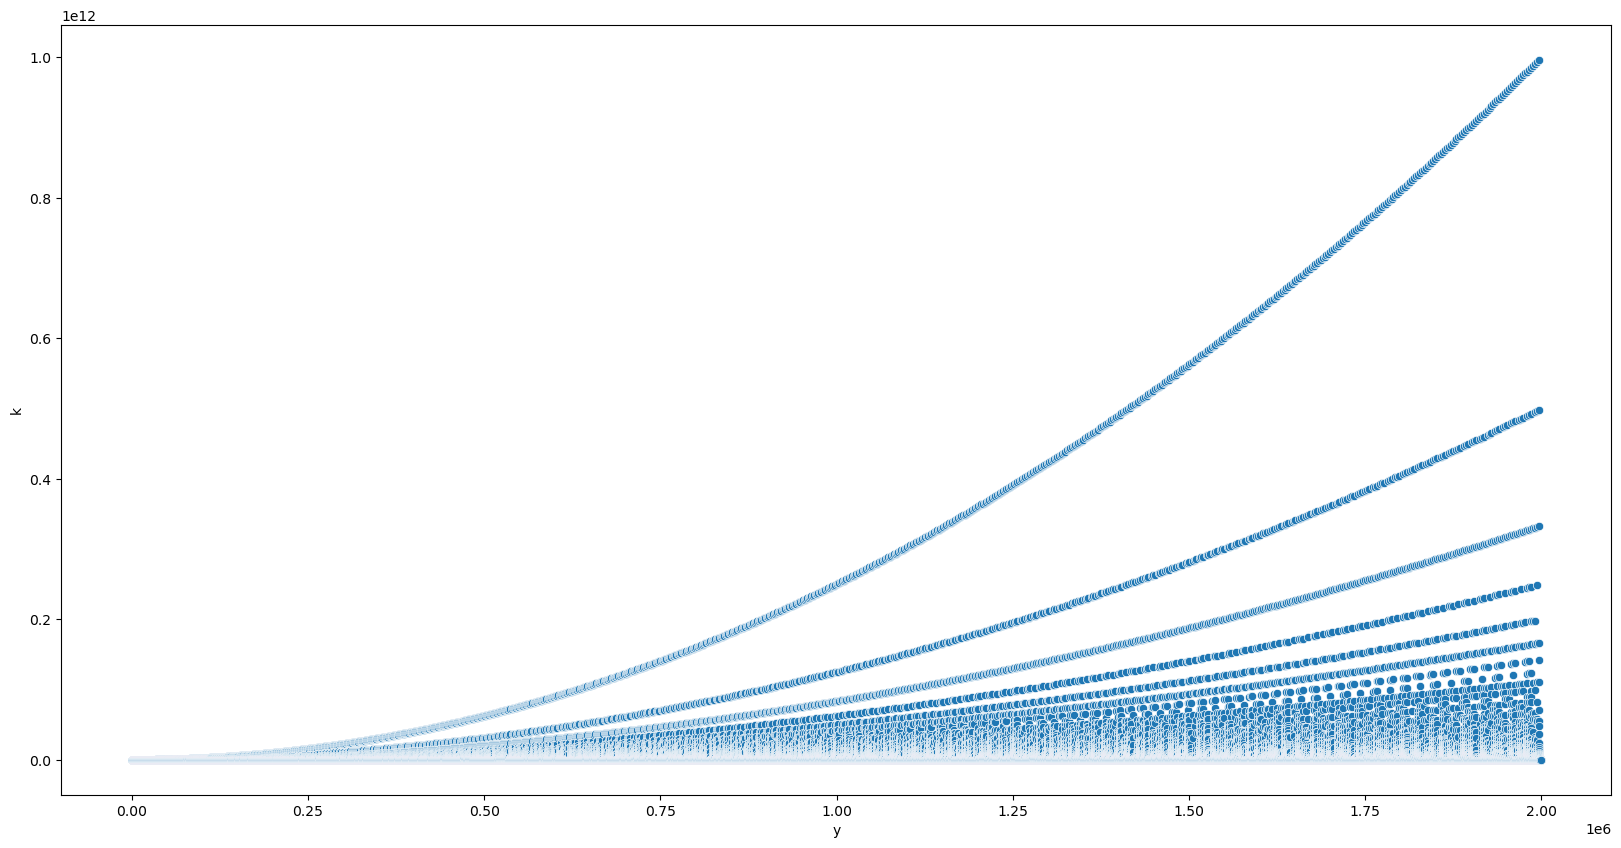

In [149]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df3, x='y', y='k')
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.show()


In [150]:
df3=df3.reset_index(drop=True)

In [151]:
df3["y2-x2"]=np.power(df3["y"],2)-np.power(df3["x"],2)
df3["y2-x"]=df3["y"]-np.power(df3["x"],2)

In [152]:
top=pd.unique(df3["y2-x2"])
top2=pd.unique(df3["y2-x"])

In [153]:
top[0:60]

array([  32,   96,  112,  160,  216,  308,  384,  432,  468,  560,  660,
        720,  704,  768,  816,  936, 1200, 1280, 1344, 1408, 1584, 1728,
       2016, 2000, 2100, 2080, 2464, 2552, 2760, 2880, 3000, 3120, 2976,
       3200, 3672, 3920, 4320, 4292, 4560, 4836, 5120, 5280, 5600, 5760,
       5712, 5880, 6048, 6020, 6336, 6660, 7200, 6808, 7144, 7488, 7680,
       7840, 8232, 8200, 8400, 8568])

In [154]:
top2[0:60]

array([  2,   6,   4,  12,   8,  10,  18,  20,  24,  36,  30,  14,  40,
        50,  60,  28,  42,  16,  32,  56,  70,  48, 100,  22,  90,  84,
       120,  54,  72,  98,  96, 126,  44,  66, 150,  26, 112, 108,  52,
       144, 110, 168,  78,  88, 162, 196, 210, 104, 132, 180, 224,  34,
       216, 198, 156,  80, 252, 300,  64,  68])

In [155]:
df3.to_csv("output_1m_rot.csv",index=False)

In [165]:
df3=df3.sort_values("k").reset_index(drop=True)

In [263]:
nuevo=df3.copy()

In [268]:
nuevo["n"]=nuevo["k"]
nuevo["u"]=(nuevo["y"]-nuevo["k"]).apply(int)
nuevo["n2"]=np.power(nuevo["k"],2).apply(int)
nuevo["2n_1"]=2*nuevo["k"]-1
nuevo["2x2_n"]=2*np.power(nuevo["x"],2)-nuevo["k"]
nuevo["2u2_n"]=2*np.power(nuevo["u"],2)-nuevo["k"]
nuevo["2x2"]=2*np.power(nuevo["x"],2)
nuevo["2u2"]=2*np.power(nuevo["u"],2)

In [269]:
#nuevo2=nuevo.loc[(nuevo["k"]<10000)].copy()

In [270]:
visa=nuevo[nuevo["u"]>0].copy()

In [271]:
visa

,i,j,k,x,y,y2-x2,y2-x,n,u,n2,2n_1,2x2_n,2u2_n,2x2,2u2
1,6,4,8,2,10,96,6,8,2,64,15,0,0,8,8
3,12,9,18,3,21,432,12,18,3,324,35,0,0,18,18
5,15,12,20,3,27,720,18,20,7,400,39,-2,78,18,98
7,24,21,28,3,45,2016,36,28,17,784,55,-10,550,18,578
8,20,16,32,4,36,1280,20,32,4,1024,63,0,0,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87732,991020,990025,1980050,995,1981045,3924538302000,991020,1980050,995,3920598002500,3960099,0,0,1980050,1980050
87793,993012,992016,1984032,996,1985028,3940335168768,993012,1984032,996,3936382977024,3968063,0,0,1984032,1984032
87851,995006,994009,1988018,997,1989015,3956179676216,995006,1988018,997,3952215568324,3976035,0,0,1988018,1988018
87910,997002,996004,1992008,998,1993006,3972071920032,997002,1992008,998,3968095872064,3984015,0,0,1992008,1992008


In [272]:
visa2=visa.loc[~(visa["2x2_n"]==visa["2u2_n"])].copy()

In [273]:
visa2

,i,j,k,x,y,y2-x2,y2-x,n,u,n2,2n_1,2x2_n,2u2_n,2x2,2u2
5,15,12,20,3,27,720,18,20,7,400,39,-2,78,18,98
7,24,21,28,3,45,2016,36,28,17,784,55,-10,550,18,578
10,22,18,33,4,40,1584,24,33,7,1089,65,-1,65,32,98
12,25,21,35,4,46,2100,30,35,11,1225,69,-3,207,32,242
14,30,26,39,4,56,3120,40,39,17,1521,77,-7,539,32,578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87163,975767,974780,1948340,987,1950547,3804632625040,976378,1948340,2207,3796028755600,3896679,-2,7793358,1948338,9741698
87175,996541,995554,1949278,987,1992095,3968441514856,1017926,1949278,42817,3799684721284,3898555,-940,3664641700,1948338,3666590978
87234,987753,986765,1952535,988,1974518,3898720356180,998374,1952535,21983,3812392926225,3905069,-247,964552043,1952288,966504578
87235,989989,989001,1952643,988,1978990,3916400443956,1002846,1952643,26347,3812814685449,3905285,-355,1386376175,1952288,1388328818


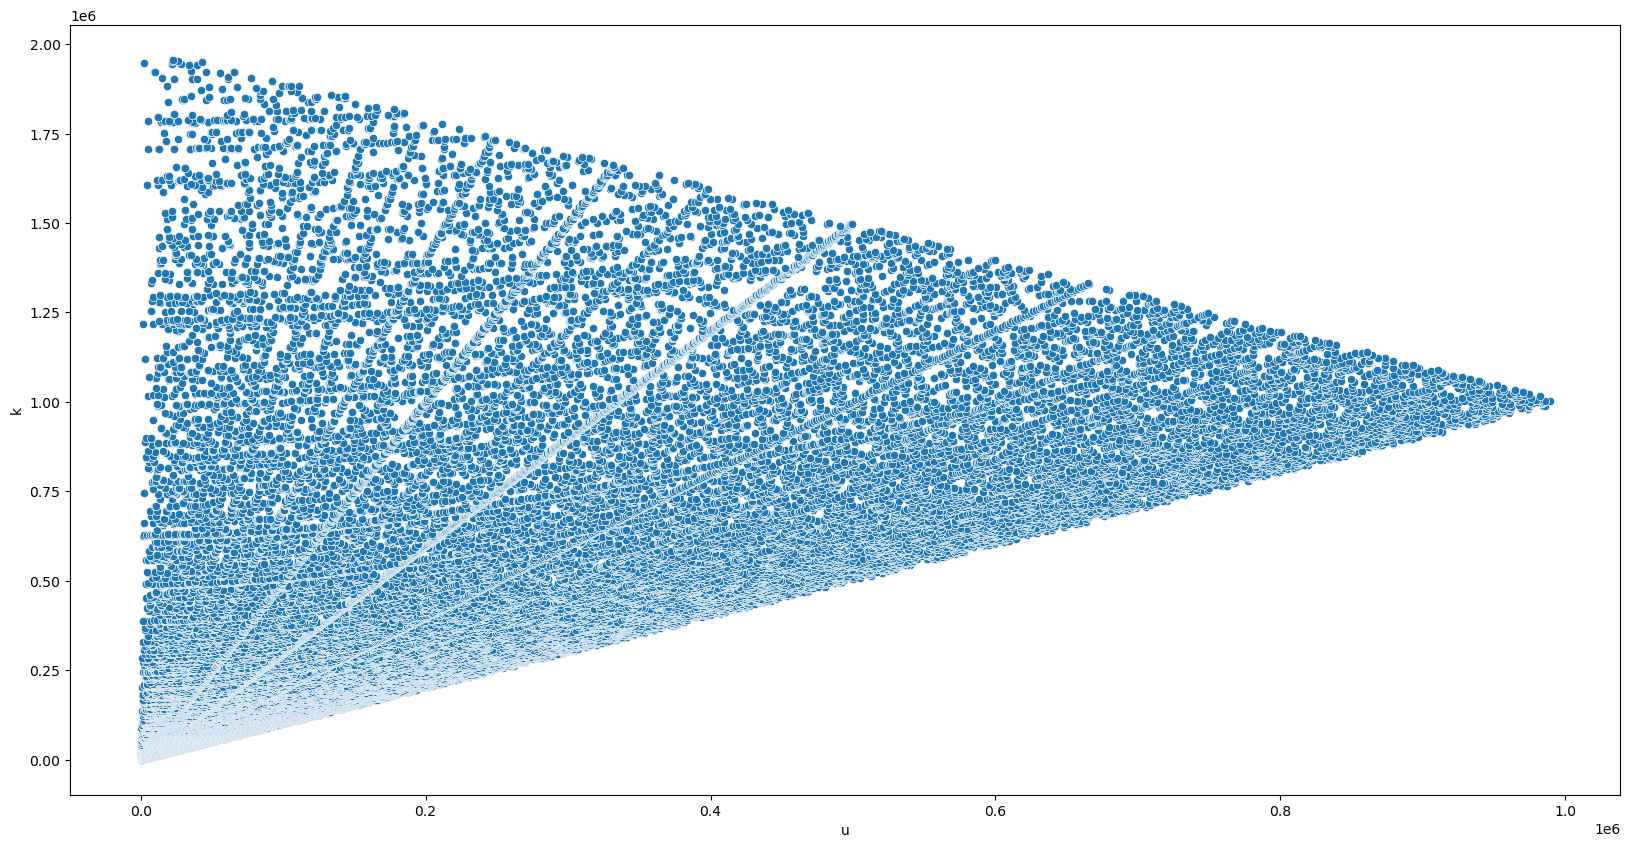

In [277]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=visa2, x='u', y='k')
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.show()

In [214]:
pix=nuevo2[["x","2n_1","u","n","2x2_n","2u2_n"]].copy()

In [215]:
pix["sum"]=np.power(pix["x"],2)*pix["2n_1"]+np.power(pix["u"],2)

In [216]:
pix

,x,2n_1,u,n,2x2_n,2u2_n,sum
0,2,15,-2,8,0,0,64
1,2,15,2,8,0,0,64
2,3,35,-3,18,0,0,324
3,3,35,3,18,0,0,324
4,3,39,-7,20,-2,78,400
5,3,39,7,20,-2,78,400
6,3,55,-17,28,-10,550,784
7,3,55,17,28,-10,550,784
8,4,63,4,32,0,0,1024
9,4,63,-4,32,0,0,1024


In [142]:
df3[df3["k"]<100]

,i,j,k,x,y,y2-x2,y2-x,2x2_n,2y2_n
0,4,2,8,2,6,32,2,4.0,4.0
1,6,4,8,2,10,96,6,4.0,68.0
2,9,6,18,3,15,216,6,9.0,63.0
3,12,9,18,3,21,432,12,9.0,279.0
4,8,5,20,3,13,160,4,8.0,8.0
5,15,12,20,3,27,720,18,8.0,568.0
6,7,4,28,3,11,112,2,4.0,4.0
7,24,21,28,3,45,2016,36,4.0,1908.0
8,20,16,32,4,36,1280,20,16.0,784.0
9,16,12,32,4,28,768,12,16.0,272.0


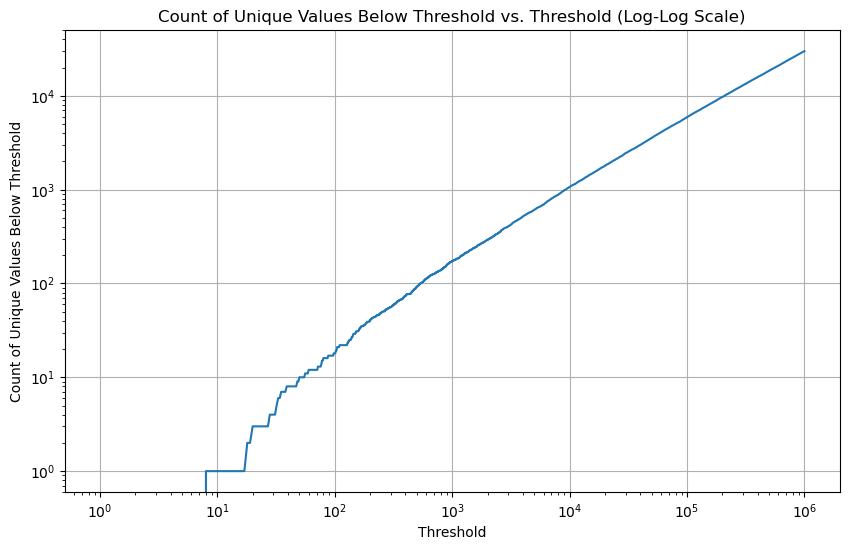

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

max_thre=1000000
# Load the data
data = df3

# Order the data by column 'k'
data_sorted = data.sort_values('k')

# Find unique values in column 'k' and sort them in ascending order
unique_values = sorted(data_sorted['k'].unique())

# Initialize a list to hold the counts of unique values below each threshold
counts = [0]*max_thre

index = 0
count = 0

# Iterate over unique values
for value in unique_values:
    while index < value and index < max_thre:
        counts[index] = count
        index += 1
    if index < max_thre:
        count += 1
        counts[index] = count

# Make the list lengths equal
while index < max_thre:
    counts[index] = count
    index += 1

# Combine the threshold values and counts into a dataframe
thresholds = list(range(max_thre))
threshold_vs_counts = pd.DataFrame({'Threshold': thresholds, 'Count': counts})

# Plot the count of unique values (y-axis) vs. the integer threshold (x-axis) on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(threshold_vs_counts['Threshold'], threshold_vs_counts['Count'])
plt.xlabel('Threshold')
plt.ylabel('Count of Unique Values Below Threshold')
plt.title('Count of Unique Values Below Threshold vs. Threshold (Log-Log Scale)')
#plt.xlim(1,1e6)
#plt.ylim(1,1e5)
plt.grid(True)
plt.show()

In [11]:
threshold_vs_counts["log_count"]=np.log(threshold_vs_counts["Count"])
threshold_vs_counts["log_th"]=np.log(threshold_vs_counts["Threshold"])
threshold_vs_counts["pow_th"]=np.power(threshold_vs_counts["Threshold"],3/4)/np.log(threshold_vs_counts["Threshold"])
#threshold_vs_counts["divi"]=threshold_vs_counts["Count"]/(threshold_vs_counts["pow_th"])

/home/rgvalenciaalbornoz/miniconda3/envs/boaxlatest/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rgvalenciaalbornoz/miniconda3/envs/boaxlatest/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rgvalenciaalbornoz/miniconda3/envs/boaxlatest/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
threshold_vs_counts2=threshold_vs_counts[["Count","pow_th"]]

In [13]:
threshold_vs_counts2.to_csv("threshold_counts_1m.csv",index=False)

In [14]:
threshold_vs_counts2

,Count,pow_th
0,0,-0.000000
1,0,inf
2,0,2.426314
3,0,2.074897
4,0,2.040279
...,...,...
999995,29912,2288.925142
999996,29912,2288.926693
999997,29912,2288.928244
999998,29912,2288.929795


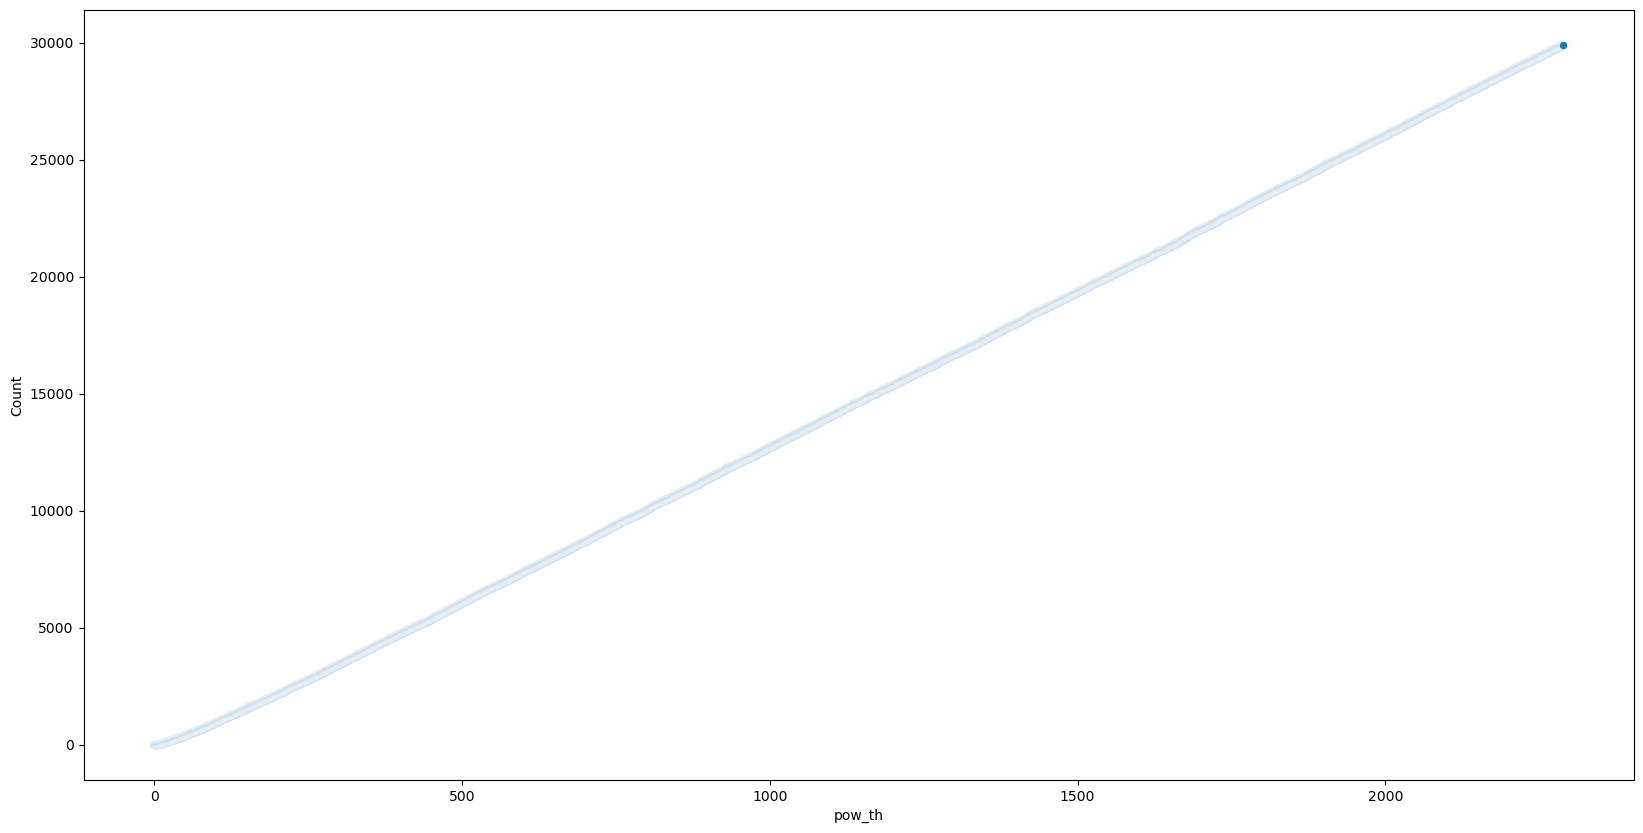

In [15]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=threshold_vs_counts2, x='pow_th', y='Count')
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.show()


In [18]:
counts

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 19,
 19,
 20,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 27,
 27,
 27,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 33,
 33,
 33,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 41,
 41,
 41,
 41,
 42,
 42,
 42,
 42,
 43,
 43,


In [21]:
[i*2 for i in unique_values]

[16,
 36,
 40,
 56,
 64,
 66,
 70,
 78,
 96,
 100,
 112,
 120,
 144,
 154,
 156,
 160,
 176,
 196,
 204,
 208,
 210,
 220,
 256,
 260,
 266,
 276,
 280,
 286,
 288,
 300,
 306,
 320,
 324,
 330,
 336,
 352,
 364,
 370,
 378,
 396,
 400,
 408,
 416,
 430,
 448,
 456,
 476,
 484,
 496,
 506,
 528,
 540,
 544,
 560,
 576,
 590,
 610,
 616,
 630,
 640,
 646,
 666,
 672,
 676,
 690,
 704,
 714,
 736,
 756,
 760,
 768,
 780,
 784,
 800,
 806,
 816,
 820,
 880,
 896,
 900,
 902,
 910,
 918,
 924,
 936,
 944,
 950,
 960,
 976,
 980,
 988,
 990,
 1008,
 1012,
 1024,
 1036,
 1044,
 1054,
 1056,
 1066,
 1080,
 1100,
 1106,
 1128,
 1134,
 1140,
 1150,
 1156,
 1160,
 1170,
 1176,
 1190,
 1200,
 1222,
 1240,
 1246,
 1248,
 1254,
 1276,
 1288,
 1296,
 1300,
 1326,
 1344,
 1350,
 1380,
 1406,
 1408,
 1444,
 1450,
 1456,
 1464,
 1496,
 1508,
 1520,
 1540,
 1548,
 1596,
 1600,
 1606,
 1624,
 1632,
 1650,
 1660,
 1666,
 1680,
 1692,
 1696,
 1704,
 1728,
 1750,
 1764,
 1768,
 1770,
 1776,
 1786,
 1798,
 1

In [16]:
data=df3.reset_index(drop=True)

In [17]:
filter1= data[(data['y'] > 2.8*data['x']**2) & (data['y'] < 2.95*data['x']**2)]

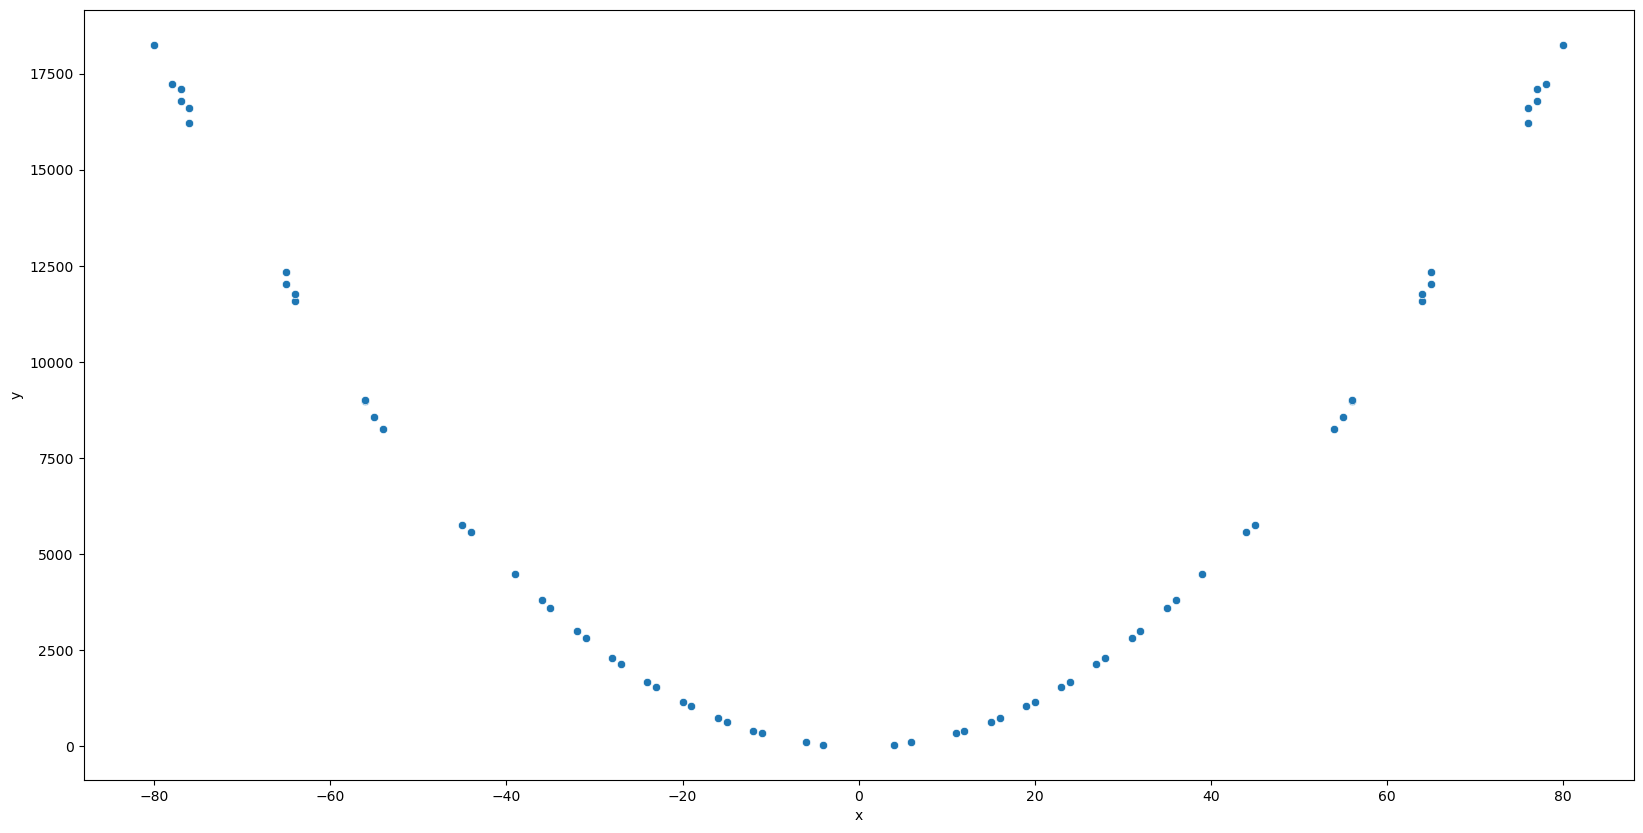

In [18]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filter1, x='x', y='y')
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.show()

In [33]:
filter2=filter1[(filter1["x"]>10) & (filter1["x"]<41) & ((filter1["x"])%4==0)]

In [34]:
588*11^2+2072*11+1825

31087

In [35]:
filter2

,i,j,k,x,y
558,210,198,315,12,408
980,376,360,564,16,736
1448,590,570,885,20,1160
2034,852,828,1278,24,1680
2623,1162,1134,1743,28,2296
3310,1520,1488,2280,32,3008
4097,1926,1890,2889,36,3816


In [21]:
filter2.to_csv("filter_2.csv",index=False)

In [36]:
datasmall=data[((data['i'] <5000) & ((data['j'] <5000)))].copy()

In [37]:
datasmall2=datasmall[(datasmall['x'] >0)].copy()

In [38]:
datasmall2["sqrt_y"]=np.sqrt(datasmall2["y"])

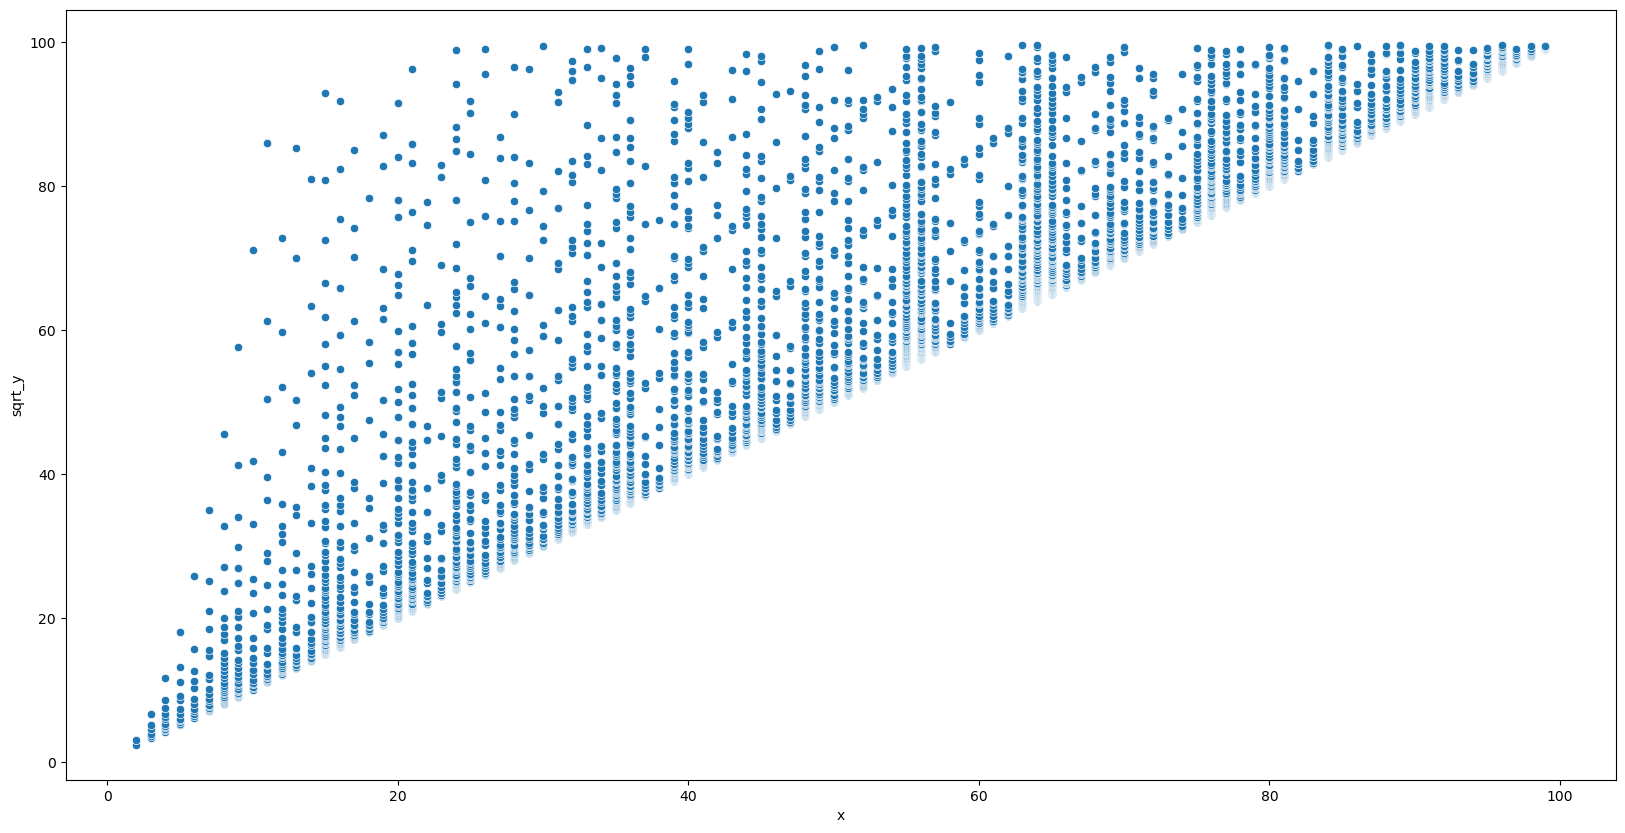

In [39]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=datasmall2, x='x', y='sqrt_y')
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.show()

In [47]:
datasmall3=datasmall2[["x","sqrt_y"]].copy()

In [48]:
datasmall3.to_csv("output_unrestricted_1000_rot_lin.csv",index=False)

In [26]:
data2=data[~((data['i'] == 0) & ((data['k'] == 0)))]

In [27]:
data3=data2[~((data2['j'] == 0) & ((data2['k'] == 0)))]

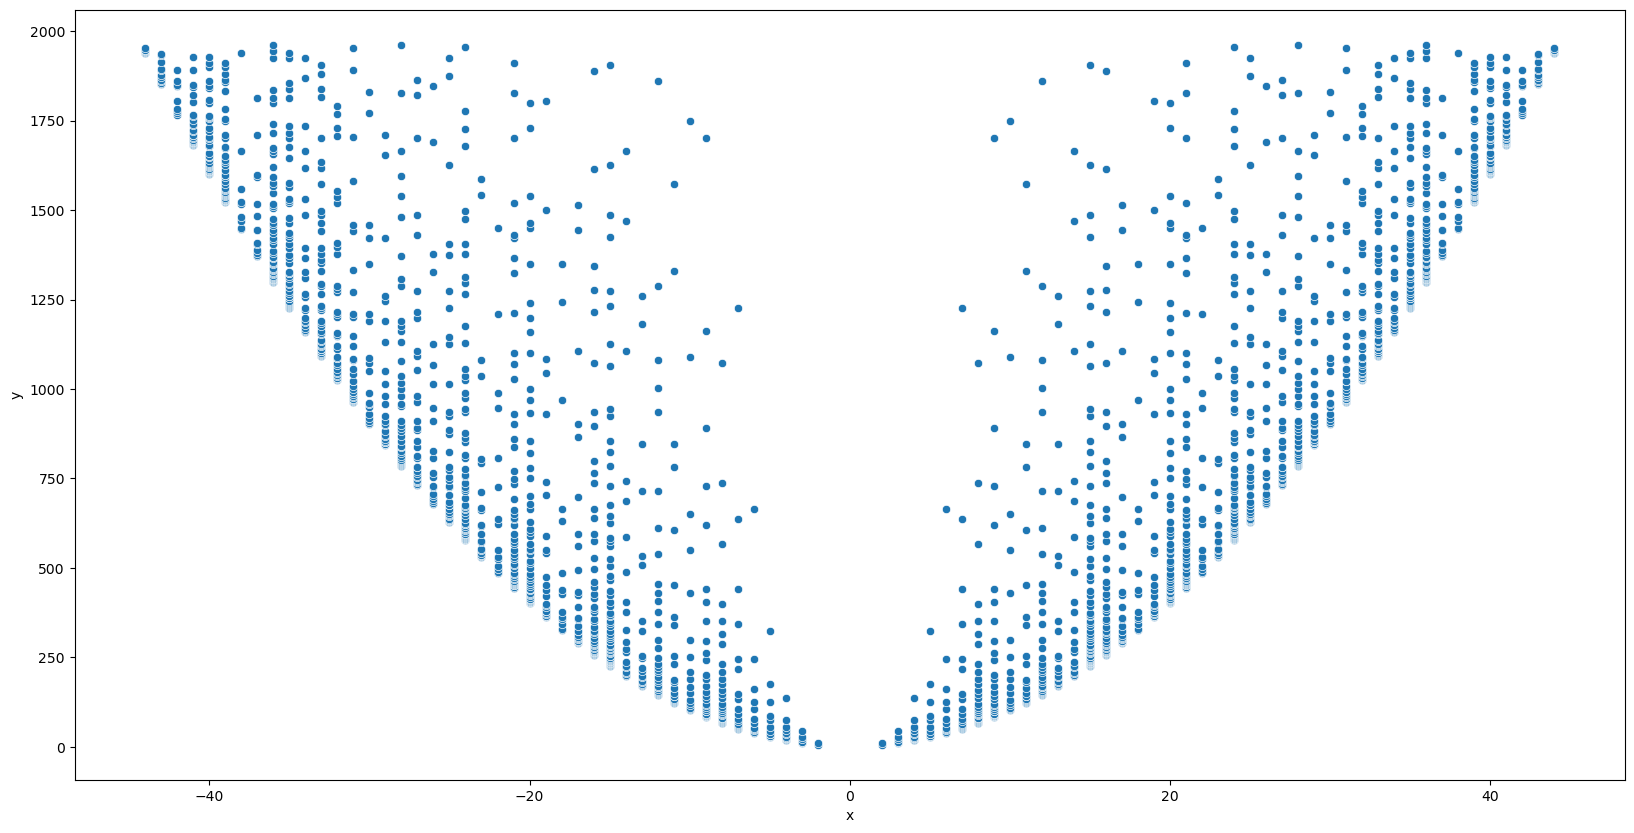

In [12]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=datasmall, x='x', y='y')
#plt.xlim(-100,100)
#plt.ylim(0,300)
plt.show()

In [42]:
datasort=data.sort_values("k")

In [43]:
pd.unique(datasort["k"])

array([       8,       18,       20, ..., 90682768, 93339752, 96054701])